## Dimensionality Reduction: Principal Component Analysis 

In [2]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn')

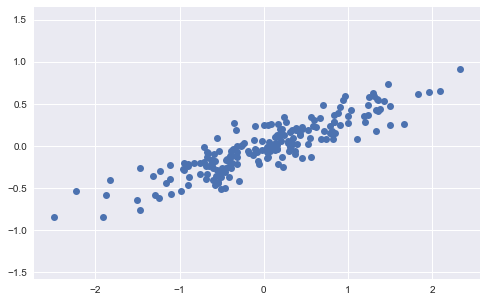

In [4]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T

plt.figure(figsize = (8,5) ) 
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


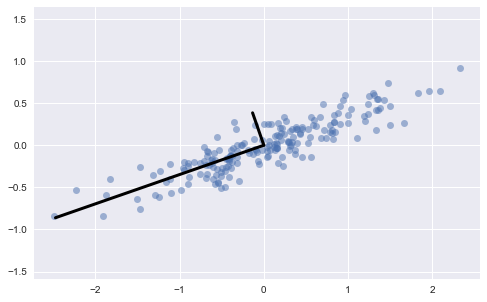

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

plt.figure(figsize = (8,5)) 
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

(200, 2)
(200, 1)


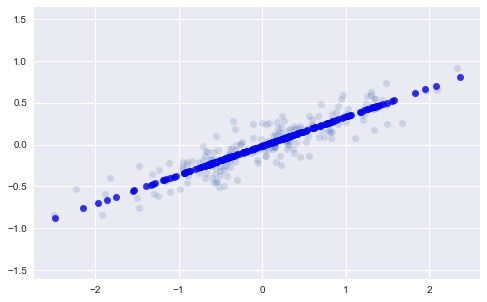

In [19]:
clf = PCA(n_components=0.9) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

X_new = clf.inverse_transform(X_trans)
plt.figure(figsize = (8,5)) 
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

- ### Application of PCA to Digits

PCA is a very useful dimensionality reduction algorithm, because it has a very intuitive interpretation via eigenvectors.

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [25]:
pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


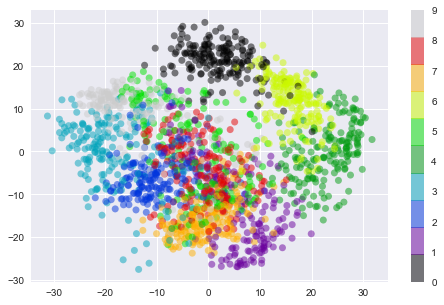

In [23]:
plt.figure(figsize = (8,5)) 
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

The input data is represented as a vector: in the case of the digits, our data is

$$
x = [x_1, x_2, x_3 \cdots]
$$

but what this really means is

$$
image(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots
$$

If we reduce the dimensionality in the pixel space to (say) 6, we recover only a partial image:

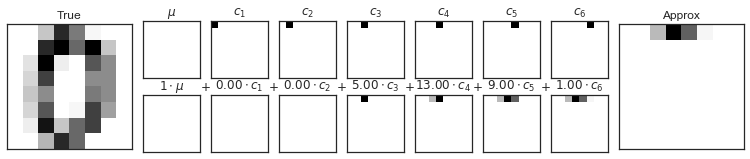

In [30]:
#from fig_code.figures import plot_image_components

with plt.style.context('seaborn-white'):
    plot_image_components(digits.data[0])

But the pixel-wise representation is not the only choice. We can also use other *basis functions*, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

What PCA does is to choose optimal **basis functions** so that only a few are needed to get a reasonable approximation.
The low-dimensional representation of our data is the coefficients of this series, and the approximate reconstruction is the result of the sum:

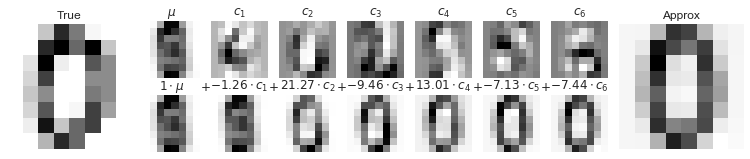

In [34]:
#from fig_code.figures import plot_pca_interactive
plot_pca_interactive(digits.data)

Thus we see that PCA can be viewed from two angles. 

- It can be viewed as dimensionality reduction, or 
- it can be viewed as a form of lossy data compression where the loss favors noise.

In this way, PCA can be used as a filtering process as well.

- ### Choosing the Number of Components

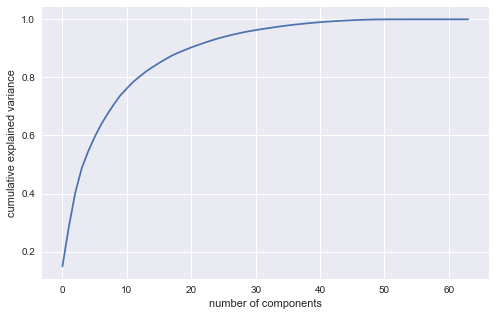

In [36]:
pca = PCA().fit(X)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. 

Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

- ### PCA as data compression

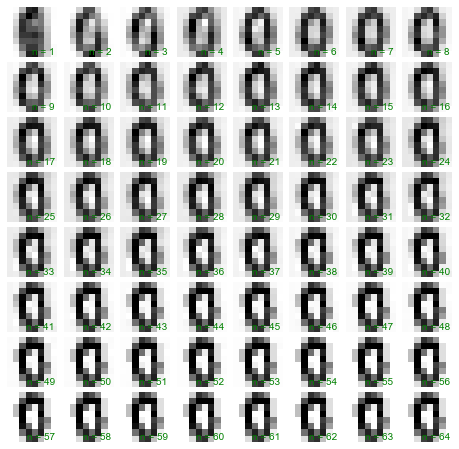

In [37]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat): # i from 0 to 63
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

- ### Programm der Figure

In [28]:
## ??????????????????????????????????????????????????????????????????????????
def plot_image_components(x, coefficients=None, mean=0, components=None,
                          imshape=(8, 8), n_components=6, fontsize=12):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 5 + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")

    approx = mean.copy()
    show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
    show(1, 2, approx, r'$1 \cdot \mu$')

    for i in range(0, n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + 3, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + 3, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                       transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")

In [32]:
def plot_pca_interactive(data, n_components=6):
    from sklearn.decomposition import PCA
    from ipywidgets import interact

    pca = PCA(n_components=n_components)
    Xproj = pca.fit_transform(data) # (1797, 6)

    def show_decomp(i=0):
        plot_image_components(data[i], Xproj[i], pca.mean_, pca.components_)
    
    interact(show_decomp, i=(0, data.shape[0] - 1));